In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [158]:
data = pd.read_csv('master.csv')

In [159]:
data[(data.country == 'Albania')&(data.year==1987)].sort_values('age')

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X
11,Albania,1987,male,5-14 years,0,338200,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
10,Albania,1987,female,55-74 years,0,144600,0.00,Albania1987,NaN,"2,156,624,900",796,G.I. Generation


#### It can be seen from above that "5-14 years" does not sort correctly, so replace it with "05-14 years"

In [160]:
data.age = data.age.replace('5-14 years','05-14 years')

In [161]:
data[(data.country == 'Albania')&(data.year==1987)].sort_values('age')

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
9,Albania,1987,female,05-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X
11,Albania,1987,male,05-14 years,0,338200,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
10,Albania,1987,female,55-74 years,0,144600,0.00,Albania1987,NaN,"2,156,624,900",796,G.I. Generation


#### Now it sorts correctly!
#### To facilitate comparative analysis the data is standardized using the weights in the table "WHO World Standard Population Distribution (%), based on world average population between 2000-2025", which is available in the link https://www.who.int/healthinfo/paper31.pdf
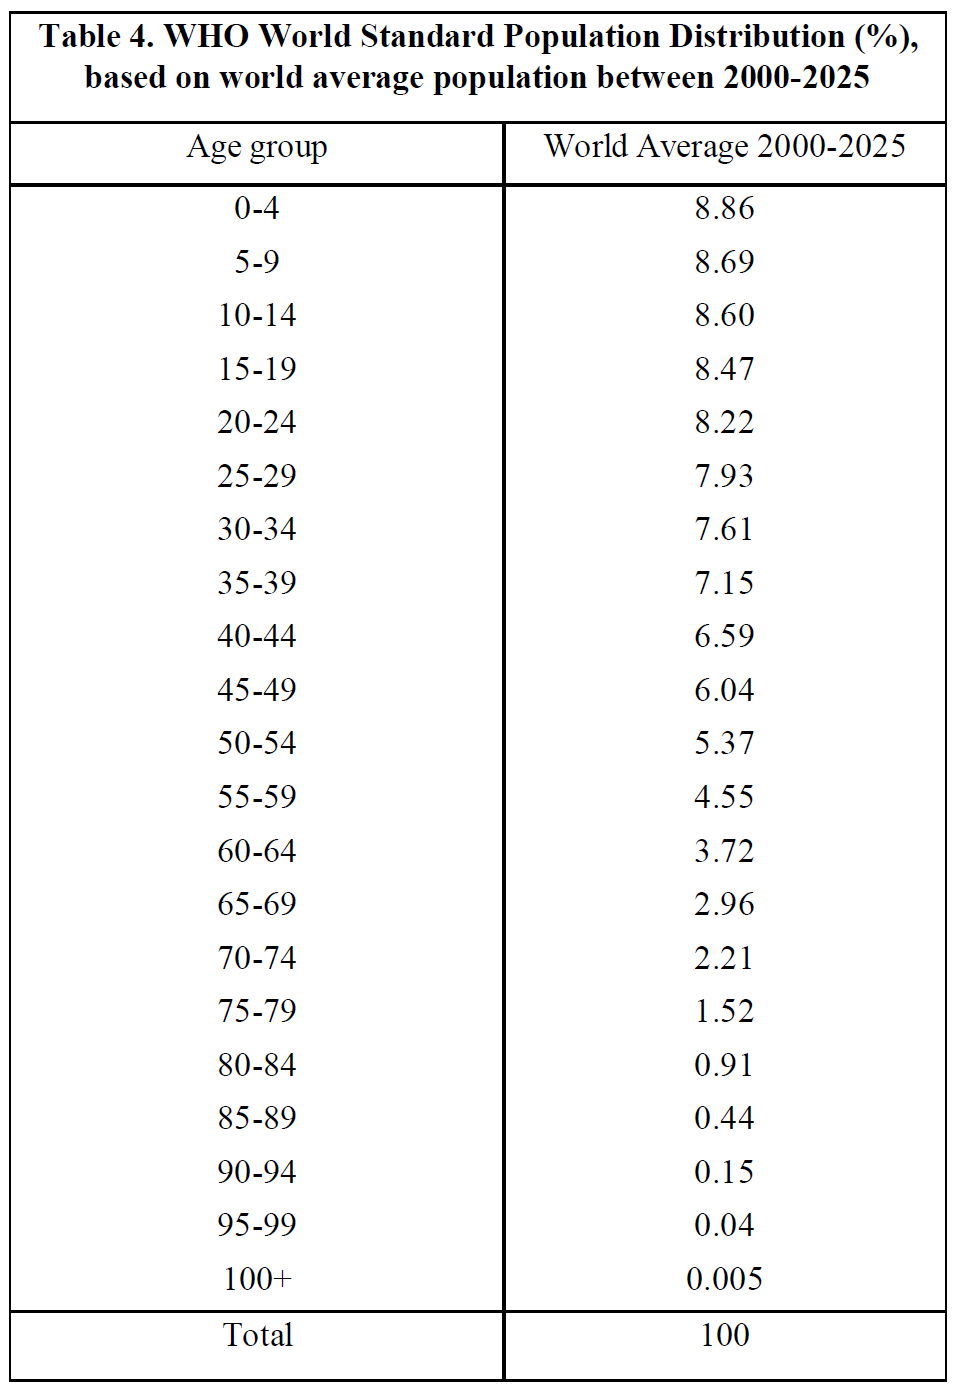
#### Now add a new column "weights"

In [162]:
data.loc[data['age']=='05-14 years',"weights"] = 0.1729
data.loc[data['age']=='15-24 years',"weights"] = 0.1669
data.loc[data['age']=='25-34 years',"weights"] = 0.1554
data.loc[data['age']=='35-54 years',"weights"] = 0.2515
data.loc[data['age']=='55-74 years',"weights"] = 0.1344
data.loc[data['age']=='75+ years',"weights"] = 0.03065
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,weights
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,0.16690
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,0.25150
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,0.16690
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,0.03065
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,0.15540


#### Check empty cells in column "weights"

In [165]:
data[data['weights'].isnull()]

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,weights,suicides/100k pop (adjusted)


#### Add another column "'suicides/100k pop (adjusted)" for age standardized rates

In [166]:
data['suicides/100k pop (adjusted)']=data['suicides/100k pop']*data['weights']
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,weights,suicides/100k pop (adjusted)
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,0.16690,1.119899
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,0.25150,1.305285
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,0.16690,0.806127
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,0.03065,0.140683
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,0.15540,0.509712


#### Check the male standardized rates for Lithuania in 2016 

In [167]:
data[(data['country']=='Lithuania')&(data['year']==2016)&(data['sex']=='male')]['suicides/100k pop (adjusted)'] 

15296     2.972437
15297    10.257408
15298    17.760930
15299     7.796418
15300     3.847045
Name: suicides/100k pop (adjusted), dtype: float64

In [168]:
data[(data['country']=='Lithuania')&(data['year']==2016)&(data['sex']=='male')]['suicides/100k pop (adjusted)'].sum()

42.634238

#### Check the same for female

In [169]:
data[(data['country']=='Lithuania')&(data['year']==2016)&(data['sex']=='female')]['suicides/100k pop (adjusted)'].sum()

5.8210835

#### Create 'data_group' with type 'DataFrameGroupBy' for further aggregation 

In [170]:
data_group = data.groupby(['country', 'year', 'sex'], as_index=False)

In [171]:
data_group

In [172]:
data_group.get_group(('Argentina', 2015, 'male'))

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,weights,suicides/100k pop (adjusted)
948,Argentina,2015,male,75+ years,245,712691,34.38,Argentina2015,NaN,"594,749,285,413",14981,Silent,0.03065,1.053747
949,Argentina,2015,male,15-24 years,656,3500580,18.74,Argentina2015,NaN,"594,749,285,413",14981,Millenials,0.16690,3.127706
950,Argentina,2015,male,55-74 years,431,3011963,14.31,Argentina2015,NaN,"594,749,285,413",14981,Boomers,0.13440,1.923264
951,Argentina,2015,male,25-34 years,465,3289927,14.13,Argentina2015,NaN,"594,749,285,413",14981,Millenials,0.15540,2.195802
952,Argentina,2015,male,35-54 years,633,5166179,12.25,Argentina2015,NaN,"594,749,285,413",14981,Generation X,0.25150,3.080875
958,Argentina,2015,male,05-14 years,39,3672155,1.06,Argentina2015,NaN,"594,749,285,413",14981,Generation Z,0.17290,0.183274


#### Create 'data_agg' of type 'DataFrame' with sum of 'suicides/100k pop (adjusted)' from all age groups

In [173]:
data_agg = data_group.agg({'suicides/100k pop (adjusted)':'sum'})
data_agg.head(10)

,country,year,sex,suicides/100k pop (adjusted)
0,Albania,1987,female,1.675402
1,Albania,1987,male,3.173691
2,Albania,1988,female,1.544828
3,Albania,1988,male,2.809785
4,Albania,1989,female,1.096466
5,Albania,1989,male,3.630200
6,Albania,1992,female,0.869905
7,Albania,1992,male,2.310426
8,Albania,1993,female,1.740135
9,Albania,1993,male,3.302573


In [174]:
type(data_agg)

pandas.core.frame.DataFrame

#### Create 'data_group_1' with type 'DataFrameGroupBy' for summing data from both male and female 

In [175]:
data_group_1 = data_agg.groupby(['country', 'year'], as_index=False)

In [176]:
data_agg_1 = data_group_1.agg({'suicides/100k pop (adjusted)': 'sum'})
data_agg_1.head(10)

,country,year,suicides/100k pop (adjusted)
0,Albania,1987,4.849094
1,Albania,1988,4.354613
2,Albania,1989,4.726667
3,Albania,1992,3.180331
4,Albania,1993,5.042708
5,Albania,1994,3.566458
6,Albania,1995,5.779901
7,Albania,1996,5.846458
8,Albania,1997,11.050584
9,Albania,1998,9.929875


#### Input year (1985-2016) and gender (male, female, or both male & female) of the plot

In [199]:
np.sort(data['year'].unique())

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

In [185]:
year_spec = 2016
# sex_spec = 'male' 
# sex_spec = 'female' 
sex_spec = 'both male & female'  

In [186]:
if sex_spec in ('male', 'female'):
    data_specific = data_agg[(data_agg.year==year_spec)&(data_agg.sex==sex_spec)].sort_values('suicides/100k pop (adjusted)', ascending=False)    
else:
    data_specific = data_agg_1[data_agg_1.year==year_spec].sort_values('suicides/100k pop (adjusted)', ascending=False)

In [187]:
data_specific_20 = data_specific.head(20)
data_specific_20

,country,year,suicides/100k pop (adjusted)
1276,Lithuania,2016,48.455322
1413,Mongolia,2016,28.316998
973,Hungary,2016,26.534605
552,Croatia,2016,23.855328
1005,Iceland,2016,21.955182
618,Czech Republic,2016,20.498490
180,Austria,2016,20.271960
2062,Sweden,2016,19.412923
1455,Netherlands,2016,17.876461
1746,Romania,2016,15.416148


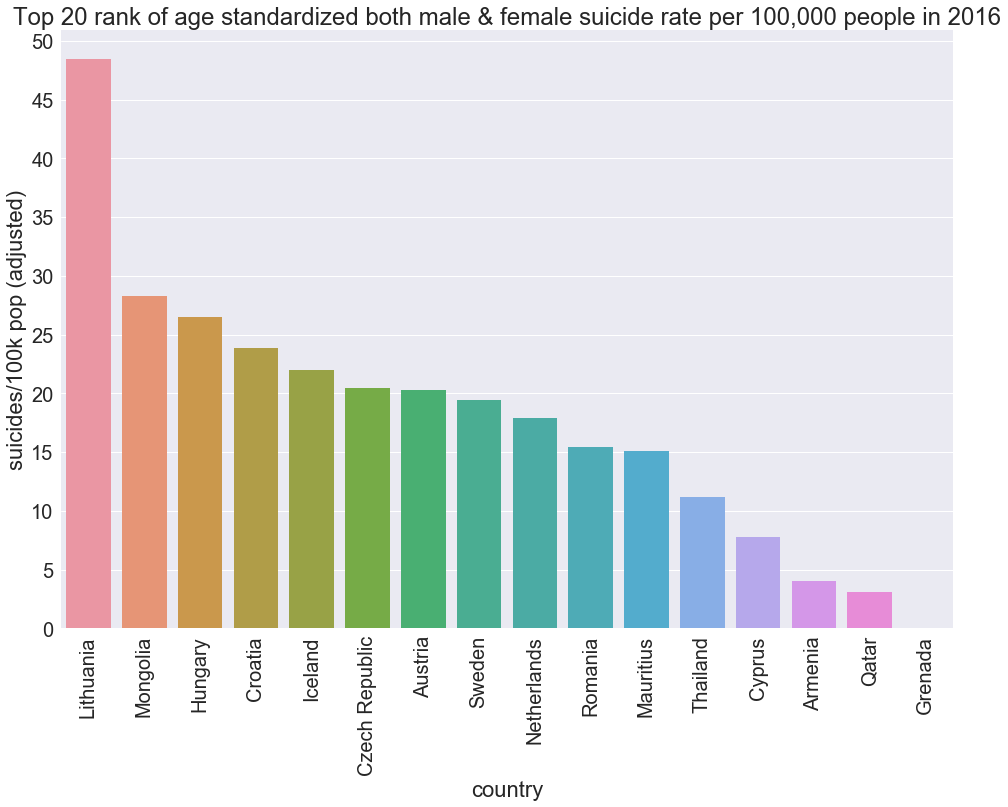

In [188]:
plt.figure(figsize=(16,11))
plt.xticks(rotation=90)
plt.yticks(np.arange(0,70,5))
plt.title('Top 20 rank of age standardized '+sex_spec+' suicide rate per 100,000 people in '+str(year_spec))
sns.barplot(x='country', y='suicides/100k pop (adjusted)', data=data_specific_20)